# Impact of Education and Occupation on Investment Decisions

Name : Anvi Maria Joy

Organization : Entri Elevate

Overview of Problem Statement : In today’s rapidly evolving economic landscape, financial literacy and investment behavior play critical roles in personal wealth management and economic stability. Financial products like term deposits provide a safe investment option for individuals, offering fixed returns with minimal risk. However, despite their benefits, a significant portion of the population either does not invest or remains unaware of these opportunities.

Objective: This project aims to analyze how an individual’s educational background and occupational status influence their likelihood to invest in financial products, such as term deposits. The insights will help financial institutions design better-targeted marketing strategies, encourage informed investment decisions, and promote financial inclusivity.

# Data Description:

Source: "https://archive.ics.uci.edu/dataset/222/bank+marketing"

Features:age,job,marital,education,default,balance,housing loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y (has the client subscribed a term deposit?)

In [54]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual file name or path to your dataset
file_path =r"C:\Users\anvim\Desktop\PYTHON ASS\machine learning\Bank data for final project.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
4  unknown    5   may       198         1     -1         0  unknown   

  y (has the client subscribed a term deposit?)  
0                                            no  
1                           

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib


In [6]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())

# Check for missing values and data types
print("\nInformation about data types and missing values:")
print(df.info())

Summary statistics for numerical columns:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000  

# Key Insights from Summary Statistics:
The age of individuals ranges from 18 to 95 years, with an average of 40.94 years.
The balance variable has a wide range (-8,019 to 102,127), indicating possible outliers or extreme values.
The duration of the last contact with a client varies significantly (0 to 4,918 seconds), meaning some calls were extremely long.
The campaign column shows that some clients were contacted as many as 63 times, which may indicate aggressive marketing efforts.
The pdays column has a median of -1, suggesting that many clients were never contacted before. The max value (871) shows that some clients were reached again after a long gap.
The previous column, which records the number of times a client was contacted before the campaign, has a median of 0, meaning most clients were contacted for the first time.

# Missing Values and Data Types:
There are no missing values in the dataset.
The dataset has 7 numerical columns (e.g., age, balance, duration) and 10 categorical columns (e.g., job, education, housing loan status).

In [7]:
# Check for duplicates
duplicates = df[df.duplicated()]

# Print duplicates
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


In [8]:
from scipy.stats import zscore

# Compute Z-scores for numerical variables
df_numerical = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
z_scores = np.abs(zscore(df_numerical))

# Define a threshold (e.g., Z-score > 3)
threshold = 3
outliers = df[(z_scores > threshold).any(axis=1)]
print(f"Total outliers detected: {outliers.shape[0]}")

Total outliers detected: 5002


In [14]:
# Count outliers per column
outlier_counts = (z_scores > threshold).sum()
print(outlier_counts)

age          381
balance      745
duration     963
campaign     840
pdays       1723
previous     582
dtype: int64


In [18]:
print(df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].skew())

age         0.456410
balance     8.360308
duration    3.144318
campaign    4.898650
pdays       2.615715
previous    3.313086
dtype: float64


# Interpretation of Skewness Values:

From this we found that pdays,duration,previous,compaign,balance are moderately and highly right skewed and possible fix approch is log transformation.
And age is slightly right skewed with fairly normal disrtibution.

In [19]:
import numpy as np
from scipy.stats import zscore

# Compute Z-scores for 'age'
z_scores = df[['age']].apply(zscore)  # Compute Z-scores per column

# Define threshold for outliers
threshold = 3

# Replace outliers with median values
for col in ['age']:
    median_value = df[col].median()  # Compute median of column
    df.loc[z_scores[col].abs() > threshold, col] = median_value  # Replace outliers

print("Outliers replaced with median for 'age'.")

Outliers replaced with median for 'age'.


In [21]:
# Shift negative values to be positive by adding a constant (only if needed)
for col in ['pdays', 'duration', 'previous', 'campaign', 'balance']:
    min_value = df[col].min()
    if min_value <= 0:
        df[col] = df[col] + abs(min_value) + 1  # Shift all values to make them positive

# Now apply log transformation safely
df['pdays_log'] = np.log1p(df['pdays'])
df['duration_log'] = np.log1p(df['duration'])
df['previous_log'] = np.log1p(df['previous'])
df['campaign_log'] = np.log1p(df['campaign'])
df['balance_log'] = np.log1p(df['balance'])


In [22]:
print(df[['pdays_log', 'duration_log', 'previous_log', 'campaign_log', 'balance_log']].skew())


pdays_log       1.725064
duration_log   -0.405510
previous_log    2.528589
campaign_log    1.326222
balance_log     1.466917
dtype: float64


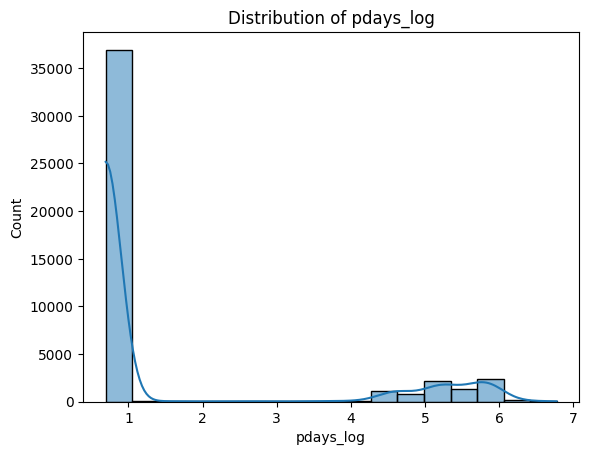

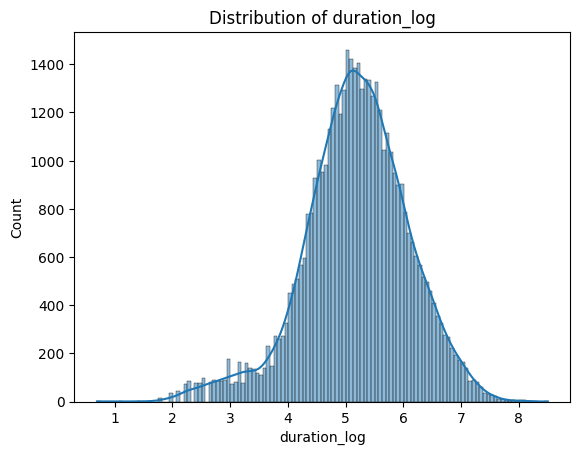

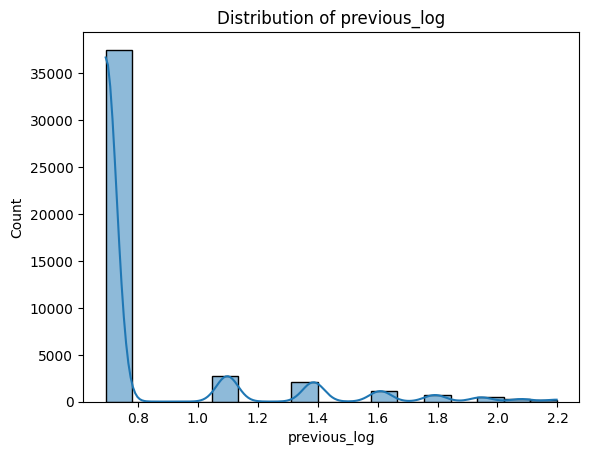

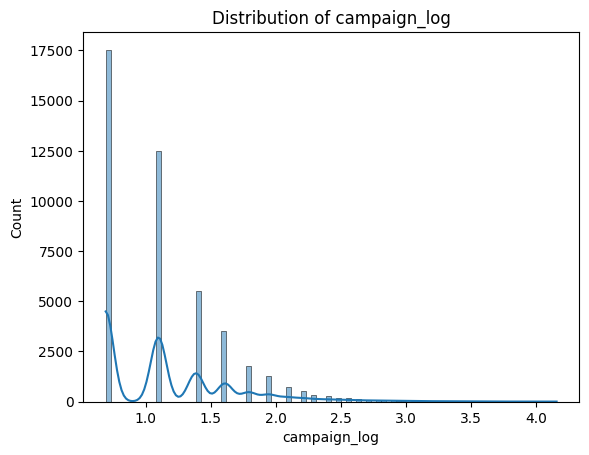

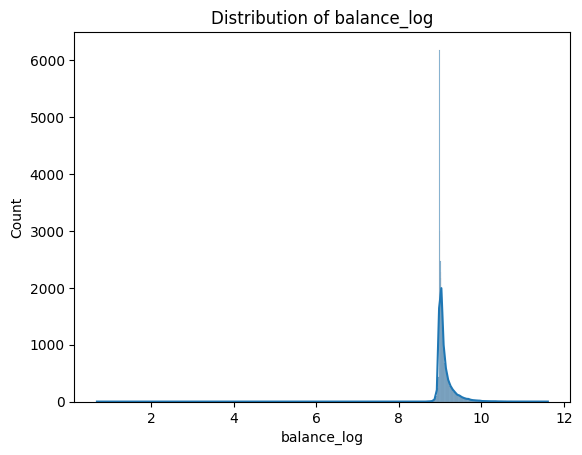

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['pdays_log', 'duration_log', 'previous_log', 'campaign_log', 'balance_log']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [9]:
for col in ['job', 'marital', 'education', 'contact', 'poutcome']:
    print(f"Unique values in {col}:\n{df[col].value_counts(normalize=True) * 100}\n")

Unique values in job:
job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64

Unique values in marital:
marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64

Unique values in education:
education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

Unique values in contact:
contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: proportion, dtype: float64

Unique values in poutcome:
poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: proportion, dtype: float64



y (has the client subscribed a term deposit?)
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


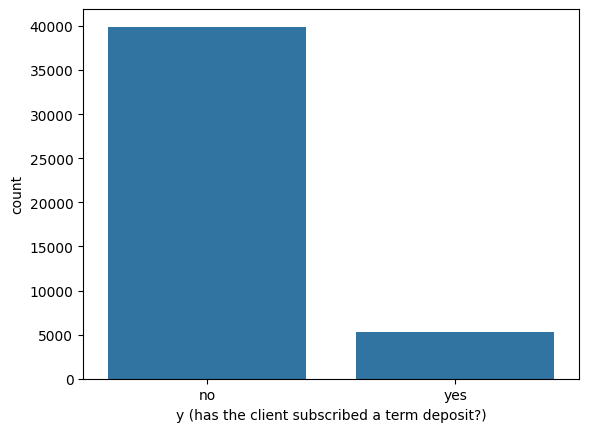

In [24]:
import seaborn as sns

sns.countplot(x=df['y (has the client subscribed a term deposit?)'])  # Assuming 'y' is your target variable
print(df['y (has the client subscribed a term deposit?)'].value_counts(normalize=True))  # Check proportions

In [59]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define features (X) and target (y)
X = df[["job", "education"]]  # Features
y = df["y (has the client subscribed a term deposit?)"]  # Target variable

# Initialize OneHotEncoder while DROPPING the first category (avoids multicollinearity)
encoder = OneHotEncoder(drop="first", sparse_output=False)  

# Fit and transform categorical features
X_encoded = encoder.fit_transform(X)

# Extract category names while dropping the first category
column_names = []
for i, feature in enumerate(X.columns):
    categories = encoder.categories_[i][1:]  # Exclude first category due to `drop="first"`
    column_names.extend([f"{feature}_{cat}" for cat in categories])

# Convert encoded array into DataFrame with correct column names
X_encoded_df = pd.DataFrame(X_encoded, columns=column_names)

# Reset index to match original DataFrame (optional)
X_encoded_df.index = df.index  

print(X_encoded_df.head())  # Check the transformed DataFrame

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0              0.0               0.0            0.0             1.0   
1              0.0               0.0            0.0             0.0   
2              0.0               1.0            0.0             0.0   
3              1.0               0.0            0.0             0.0   
4              0.0               0.0            0.0             0.0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0          0.0                0.0           0.0          0.0             0.0   
1          0.0                0.0           0.0          0.0             1.0   
2          0.0                0.0           0.0          0.0             0.0   
3          0.0                0.0           0.0          0.0             0.0   
4          0.0                0.0           0.0          0.0             0.0   

   job_unemployed  job_unknown  education_secondary  education_tertiary  \
0             0.0

In [57]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure no non-numeric data exists (only encoded features)
X_numeric = X_encoded_df.astype(float)  

# Create a DataFrame for VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]

# Print the VIF values
print(vif_data)

                Feature       VIF
0       job_blue-collar  1.399983
1      job_entrepreneur  1.154574
2         job_housemaid  1.033481
3        job_management  2.804633
4           job_retired  1.104043
5     job_self-employed  1.188602
6          job_services  1.377459
7           job_student  1.102458
8        job_technician  1.793324
9        job_unemployed  1.091960
10          job_unknown  1.048705
11  education_secondary  2.617893
12   education_tertiary  3.291603
13    education_unknown  1.189725


C:\Users\anvim\AppData\Local\Temp\ipykernel_20724\1989706450.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues")


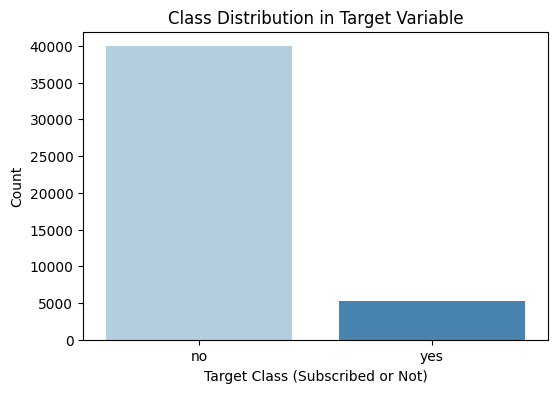

Class Distribution:
 y (has the client subscribed a term deposit?)
no     39922
yes     5289
Name: count, dtype: int64
Percentage Distribution:
 y (has the client subscribed a term deposit?)
no     88.30152
yes    11.69848
Name: count, dtype: float64


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
class_counts = y.value_counts()

# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues")
plt.xlabel("Target Class (Subscribed or Not)")
plt.ylabel("Count")
plt.title("Class Distribution in Target Variable")
plt.show()

# Print class ratio
print("Class Distribution:\n", class_counts)
print("Percentage Distribution:\n", class_counts / class_counts.sum() * 100)


In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [72]:
# count of each class after SMOTE
class_counts_resampled = y_train_resampled.value_counts()

print("Class Counts After SMOTE:")
print(class_counts_resampled)

Class Counts After SMOTE:
y (has the client subscribed a term deposit?)
no     31937
yes    31937
Name: count, dtype: int64


In [73]:
import pandas as pd

# Convert the resampled dataset into a DataFrame
balanced_encoded_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)  # Retain encoded feature names
balanced_encoded_df["target"] = y_train_resampled  # Add target variable

# Save to CSV
balanced_encoded_df.to_csv("balanced_encoded_data.csv", index=False)

print("Balanced and encoded data saved successfully as 'balanced_encoded_data.csv'.")

Balanced and encoded data saved successfully as 'balanced_encoded_data.csv'.


In [76]:
import pandas as pd

# Load the dataset
df = pd.read_csv("balanced_encoded_data.csv")

# Display the first few rows
print(df.head())



   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0              0.0               0.0            0.0             0.0   
1              0.0               0.0            0.0             0.0   
2              0.0               0.0            0.0             0.0   
3              0.0               0.0            0.0             0.0   
4              0.0               0.0            0.0             0.0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0          0.0                0.0           0.0          0.0             1.0   
1          0.0                0.0           0.0          1.0             0.0   
2          0.0                0.0           0.0          0.0             1.0   
3          0.0                0.0           0.0          0.0             0.0   
4          0.0                0.0           0.0          0.0             1.0   

   job_unemployed  job_unknown  education_secondary  education_tertiary  \
0             0.0

In [88]:
import pandas as pd

# Load the dataset
df = pd.read_csv("balanced_encoded_data.csv")

# Display all column names (feature names)
print(df.columns)

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'target'],
      dtype='object')


In [89]:
# Check class distribution
print(df["target"].value_counts())

# Check class distribution as a percentage
print(df["target"].value_counts(normalize=True) * 100)

target
no     31937
yes    31937
Name: count, dtype: int64
target
no     50.0
yes    50.0
Name: proportion, dtype: float64


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the balanced and encoded dataset
df = pd.read_csv("balanced_encoded_data.csv")

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # All features except the last column
y = df.iloc[:, -1]   # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1️⃣ Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("📌 Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))

# 2️⃣ Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("\n📌 Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

📌 Decision Tree Performance:
Accuracy: 0.5802
              precision    recall  f1-score   support

          no       0.58      0.55      0.56      6334
         yes       0.58      0.61      0.59      6441

    accuracy                           0.58     12775
   macro avg       0.58      0.58      0.58     12775
weighted avg       0.58      0.58      0.58     12775


📌 Random Forest Performance:
Accuracy: 0.5802
              precision    recall  f1-score   support

          no       0.58      0.55      0.56      6334
         yes       0.58      0.61      0.59      6441

    accuracy                           0.58     12775
   macro avg       0.58      0.58      0.58     12775
weighted avg       0.58      0.58      0.58     12775



# Interpretation of Model Performance (Decision Tree & Random Forest)
Both models (Decision Tree & Random Forest) have the same accuracy of 58.02%, which suggests that the models are struggling to distinguish between customers who will and won’t subscribe to the term deposit.



The model slightly favors predicting "Yes" (higher recall for "Yes").
However, since precision and recall are close, the model is not making highly confident predictions.
The overall performance is weak, suggesting feature engineering or hyperparameter tuning is needed.

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the balanced and encoded dataset
df = pd.read_csv("balanced_encoded_data.csv")

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # All features except the last column
y = df.iloc[:, -1]   # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1️⃣ Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("📌 Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

# 2️⃣ Train Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate SVM
print("\n📌 SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

# 3️⃣ Train K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default 5 neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate KNN
print("\n📌 KNN Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))


📌 Logistic Regression Performance:
Accuracy: 0.5803
              precision    recall  f1-score   support

          no       0.58      0.56      0.57      6334
         yes       0.58      0.60      0.59      6441

    accuracy                           0.58     12775
   macro avg       0.58      0.58      0.58     12775
weighted avg       0.58      0.58      0.58     12775


📌 SVM Performance:
Accuracy: 0.5677
              precision    recall  f1-score   support

          no       0.55      0.66      0.60      6334
         yes       0.59      0.48      0.53      6441

    accuracy                           0.57     12775
   macro avg       0.57      0.57      0.56     12775
weighted avg       0.57      0.57      0.56     12775


📌 KNN Performance:
Accuracy: 0.5542
              precision    recall  f1-score   support

          no       0.57      0.41      0.48      6334
         yes       0.55      0.69      0.61      6441

    accuracy                           0.55     12775
  

# Comparison of logistic Regression,SVM and KNN:
• Logistic Regression performed the best among the three models, but all accuracies are relatively low (around 55-58%). • SVM performed slightly worse than Logistic Regression. • KNN had the lowest accuracy, suggesting it may not be a good fit for this dataset.

KEY OBSERVATIONS:
All models have similar accuracy (~55%-58%), which indicates that the dataset might be too complex or lacks informative features. Decision Tree & Random Forest perform similarly to Logistic Regression, meaning non-linear methods did not significantly improve results. a. SVM vs. KNN Performance

SVM is better at identifying "No" (66% recall) but struggles with "Yes" (48% recall). KNN is better at identifying "Yes" (69% recall) but struggles with "No" (41% recall). Both models show imbalanced class performance, making them unreliable. b. Random Forest & Decision Tree Not Much Better

Random Forest, expected to outperform other models, still has an accuracy of 58%, meaning it isn't leveraging feature importance well. This suggests feature engineering or alternative modeling techniques are needed.

# KEY OBSERVATIONS: 

All models have similar accuracy (~55%-58%), which indicates that the dataset might be too complex or lacks informative features. Decision Tree & Random Forest perform similarly to Logistic Regression, meaning non-linear methods did not significantly improve results.
SVM is better at identifying "No" (66% recall) but struggles with "Yes" (48% recall). KNN is better at identifying "Yes" (69% recall) but struggles with "No" (41% recall). Both models show imbalanced class performance, making them unreliable.
Random Forest, expected to outperform other models, still has an accuracy of 58%, meaning it isn't leveraging feature importance well. This suggests feature engineering or alternative modeling techniques are needed.


In [107]:
!pip --default-timeout=100 install xgboost

  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 495.5 kB/s eta 0:04:13
   ---------------------------------------- 0.0/124.9 MB 495.5 kB/s eta 0:04:13
   ---------------------------------------- 0.1/124.9 MB 375.8 kB/s eta 0:05:33
   ---------------------------------------- 0.1/124.9 MB 602.4 kB/s eta 0:03:28
   ---------------------------------------- 0.2/124.9 MB 939.4 kB/s eta 0:02:13
   ---------------------------------------- 0.2/124.9 MB 939.4 kB/s eta 0:02:13
   ---------------------------------------- 0.4/124.9 MB 1.2 MB/s eta 0:01:40
   ---------------------------------------- 0.6/124.9 MB 1.5 MB/s eta 0:01:25
   -------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ------------------------------------ --- 114.4/124.9 MB 2.1 MB/s eta 0:00:06
   ------------------------------------ --- 114.6/124.9 MB 2.1 MB/s eta 0:00:05
   ------------------------------------ --- 114.7/124.9 MB 2.1 MB/s eta 0:00:05
   ------------------------------------ --- 114.8/124.9 MB 2.1 MB/s eta 0:00:05
   ------------------------------------ --- 114.9/124.9 MB 2.1 MB/s eta 0:00:05
   ------------------------------------ --- 115.1/124.9 MB 2.1 MB/s eta 0:00:05
   ------------------------------------ --- 115.2/124.9 MB 2.1 MB/s eta 0:00:05
   ------------------------------------ --- 115.3/124.9 MB 2.1 MB/s eta 0:00:05
   ------------------------------------ --- 115.4/124.9 MB 2.1 MB/s eta 0:00:05
   ------------------------------------- -- 115.5/124.9 MB 2.2 MB/s eta 0:00:05
   ------------------------------------- -- 115.7/124.9 MB 2.2 MB/s eta 0:00:05
   ------------------------------------- -- 115.8/124.9 MB 2.2 MB/s eta 0:00:05
   -------------------------------------

In [109]:
!pip --default-timeout=100 install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.5 MB 487.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.5 MB 657.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.5 MB 1.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 1.8 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 1.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 2.3 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 2.5 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 2.7 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.5 MB 2.9 MB/s eta 0:00:01
   ------------------------------------- -- 1.4/1.5 MB 2.9 MB/s eta 0:00:01
   -----------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import catboost

print("NumPy Version:", np.__version__)
print("CatBoost Version:", catboost.__version__)

NumPy Version: 1.26.4
CatBoost Version: 1.2.7


In [118]:
!pip install numpy==1.26.0

     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.1 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.1 kB 186.2 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.1 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 61.1/61.1 kB 295.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.5 MB 3.2 MB/s eta 0:00:05
    --------------------------------------- 0.3/15.5 MB 2.9 MB/s eta 0:00:06
   - -------------------------------------- 0.4/15.5 MB 3.5 MB/s eta 0:00:05
   - -------------------------------------- 0.4/15.5 MB 2.7 MB/s eta 0:00:06
   - -------------------------------------- 0.6/15.5 MB 2.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.9/15.5 MB 3.3 MB/s eta 0:00:05
   -- ----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from sklearn.preprocessing import LabelEncoder

# Convert 'yes'/'no' to 1/0
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [12]:
import matplotlib
import xgboost

print("XGBoost version:", xgboost.__version__)
print("Matplotlib version:", matplotlib.__version__)

XGBoost version: 2.1.4
Matplotlib version: 3.10.0


In [23]:
!pip install xgboost==1.7.6

In [24]:
import xgboost
help(xgboost.XGBClassifier.fit)

Help on function fit in module xgboost.sklearn:

fit(self, X: Any, y: Any, *, sample_weight: Optional[Any] = None, base_margin: Optional[Any] = None, eval_set: Optional[Sequence[Tuple[Any, Any]]] = None, verbose: Union[bool, int, NoneType] = True, xgb_model: Union[xgboost.core.Booster, str, xgboost.sklearn.XGBModel, NoneType] = None, sample_weight_eval_set: Optional[Sequence[Any]] = None, base_margin_eval_set: Optional[Sequence[Any]] = None, feature_weights: Optional[Any] = None) -> 'XGBClassifier'
    Fit gradient boosting classifier.

    Note that calling ``fit()`` multiple times will cause the model object to be
    re-fit from scratch. To resume training from a previous checkpoint, explicitly
    pass ``xgb_model`` argument.

    Parameters
    ----------
    X :
        Feature matrix. See :ref:`py-data` for a list of supported types.

        When the ``tree_method`` is set to ``hist``, internally, the
        :py:class:`QuantileDMatrix` will be used instead of the :py:class:`DM

In [26]:
early_stopping_rounds=20

In [27]:
import xgboost
help(xgboost.XGBClassifier.fit)

Help on function fit in module xgboost.sklearn:

fit(self, X: Any, y: Any, *, sample_weight: Optional[Any] = None, base_margin: Optional[Any] = None, eval_set: Optional[Sequence[Tuple[Any, Any]]] = None, verbose: Union[bool, int, NoneType] = True, xgb_model: Union[xgboost.core.Booster, str, xgboost.sklearn.XGBModel, NoneType] = None, sample_weight_eval_set: Optional[Sequence[Any]] = None, base_margin_eval_set: Optional[Sequence[Any]] = None, feature_weights: Optional[Any] = None) -> 'XGBClassifier'
    Fit gradient boosting classifier.

    Note that calling ``fit()`` multiple times will cause the model object to be
    re-fit from scratch. To resume training from a previous checkpoint, explicitly
    pass ``xgb_model`` argument.

    Parameters
    ----------
    X :
        Feature matrix. See :ref:`py-data` for a list of supported types.

        When the ``tree_method`` is set to ``hist``, internally, the
        :py:class:`QuantileDMatrix` will be used instead of the :py:class:`DM

In [30]:
from sklearn.preprocessing import LabelEncoder

# Convert 'yes'/'no' to 1/0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 'yes' → 1, 'no' → 0

# Proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42, n_jobs=-1)

# Perform cross-validation
cv_scores = cross_val_score(xgb, X_train_selected, y_train, cv=5, scoring='accuracy')

print("XGBoost Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Train on the full dataset
xgb.fit(X_train_selected, y_train)

XGBoost Cross-Validation Accuracy Scores: [0.58502935 0.58581213 0.58414873 0.58620352 0.57637734]
Mean Accuracy: 0.5835142148206719


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Load the balanced and encoded dataset
df = pd.read_csv("balanced_encoded_data.csv")

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # All features except the last column
y = df.iloc[:, -1]   # Target variable

# Convert categorical target variable to numeric (Fixing previous issue)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 'yes' → 1, 'no' → 0

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert DataFrames to NumPy arrays for efficiency
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# 1️⃣ Feature Selection using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Select features dynamically based on importance
selector = SelectFromModel(rf, threshold="median", prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# 2️⃣ Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), 
                                   param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_selected, y_train)

# Train the best Random Forest model
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_selected)

print("Best RF Parameters:", random_search.best_params_)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# 3️⃣ Alternative Model: XGBoost with Cross-Validation
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42, n_jobs=-1)

# Perform cross-validation
cv_scores = cross_val_score(xgb, X_train_selected, y_train, cv=5, scoring='accuracy')

print("\nXGBoost Cross-Validation Accuracy Scores:", cv_scores)
print("Mean XGBoost Accuracy:", np.mean(cv_scores))

# Train final XGBoost model on full training set
xgb.fit(X_train_selected, y_train)
y_pred_xgb = xgb.predict(X_test_selected)

print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# 4️⃣ Compare Model Performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print("\nFinal Model Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")


Best RF Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.64      0.60      6388
           1       0.59      0.52      0.55      6387

    accuracy                           0.58     12775
   macro avg       0.58      0.58      0.58     12775
weighted avg       0.58      0.58      0.58     12775


XGBoost Cross-Validation Accuracy Scores: [0.58502935 0.58581213 0.58414873 0.58620352 0.57637734]
Mean XGBoost Accuracy: 0.5835142148206719

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.64      0.60      6388
           1       0.59      0.52      0.55      6387

    accuracy                           0.58     12775
   macro avg       0.58      0.58      0.58     12775
weighted avg       0.58      0.58      0.58     12775


Final Model Comparison:
Ra

# Interpretation of the Results

##  1.Random Forest Performance

•	Accuracy: 58%

•	Precision & Recall:For NON INVESTORS-Precision: 57% of predicted non-investors were actually non-investors and Recall: 64% of actual non-investors were correctly identified.Fr INVESTORS-Precision: 59% of predicted investors were actual investors and Recall Only 52% of actual investors were correctly identified.

## 2.XGBoost Performance

•	Cross-Validation Mean Accuracy: 58.35%

•	Final Model Accuracy: 58%

•	Precision & Recall (Similar to RF):

## Key Observations

1.	Both models have similar performance (~58% accuracy):This suggests that feature selection and hyperparameter tuning did not significantly improve model differentiation.The dataset might lack strong predictive signals for investment behavior.

2.	Recall for class 1 (investors) is low (52%):The model is missing many actual investors, meaning it’s struggling to correctly classify them.This suggests imbalanced data or features that are not strong enough.

3.	Precision for class 1 (investors) is 59%:When the model predicts someone will invest, it is correct 59% of the time.This is slightly better than random guessing but not strong.